### 과제: 언어분류모델
- 알파벳의 빈도 수에 따라 분류 할 수 있음 <--- 이는 언어학 기반임
- 알파벳을 소문자든 대문자든 통일 시키기
- columns: a ~ z or A ~ Z
- label class: en, fr, id, tl
- learning merthod: supervised learning, multi classification, deep learning
- learning algorithm: kinds of classification algorithm
- frame work: pytorch

- Language multi classification
---
- train data: '../data/Language/lang_train.csv
- test data: '../data/Language/lang_test.csv
- feature: a to z
- label: en, fr, id, tl

In [1]:
import pandas as pd
import work_model_class_func as work

from torchinfo import summary

In [2]:
train_df = pd.read_csv('../data/Language/lang_train.csv', encoding='utf-8')
test_df = pd.read_csv('../data/Language/lang_test.csv', encoding='utf-8')

In [3]:
train_dt = work.LangTrainDataset(train_df)
test_dt = work.LangTestDataset(train_df)

In [4]:
train_dt.features, train_dt.n_features

(Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n',
        'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'],
       dtype='object'),
 26)

In [5]:
train_dt.labels, train_dt.n_labels

(array(['en', 'fr', 'id', 'tl'], dtype=object), 4)

In [6]:
lang_model = work.LangMCModel()

print(lang_model)
summary(lang_model, input_size=(20, 26))

LangMCModel(
  (input_layer): Linear(in_features=26, out_features=20, bias=True)
  (hidden_layer): Linear(in_features=20, out_features=10, bias=True)
  (output_layer): Linear(in_features=10, out_features=4, bias=True)
)


Layer (type:depth-idx)                   Output Shape              Param #
LangMCModel                              [20, 4]                   --
├─Linear: 1-1                            [20, 20]                  540
├─Linear: 1-2                            [20, 10]                  210
├─Linear: 1-3                            [20, 4]                   44
Total params: 794
Trainable params: 794
Non-trainable params: 0
Total mult-adds (M): 0.02
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.00
Estimated Total Size (MB): 0.01

In [7]:
# dataset, model, epochs, lr, batchsize, threshold
# dataset: train_dt
# model: lang_model
# epoch: 100
# learning rate: 0.001
# batch_size: 16
# threshold: 5

loss_dict, score_dict, pred_dict = work.training(train_dt, lang_model, 200, 0.001, 16, 5)

saved first
[    5/  200]  [Train]         loss: 1.199452, score: 0.439422
[    5/  200]  [Validation]    loss: 1.317208, score: 0.439422
[   10/  200]  [Train]         loss: 1.092998, score: 0.536155
[   10/  200]  [Validation]    loss: 1.201538, score: 0.536155
[   15/  200]  [Train]         loss: 0.934280, score: 0.633230
[   15/  200]  [Validation]    loss: 1.009436, score: 0.633230
[   20/  200]  [Train]         loss: 0.700809, score: 0.636854
[   20/  200]  [Validation]    loss: 0.734614, score: 0.636854
[   25/  200]  [Train]         loss: 0.479293, score: 0.650900
[   25/  200]  [Validation]    loss: 0.475242, score: 0.650900
[   30/  200]  [Train]         loss: 0.321518, score: 0.684374
[   30/  200]  [Validation]    loss: 0.294272, score: 0.684374
[   35/  200]  [Train]         loss: 0.229335, score: 0.691290
[   35/  200]  [Validation]    loss: 0.194658, score: 0.691290
[   40/  200]  [Train]         loss: 0.174130, score: 0.705945
[   40/  200]  [Validation]    loss: 0.1413

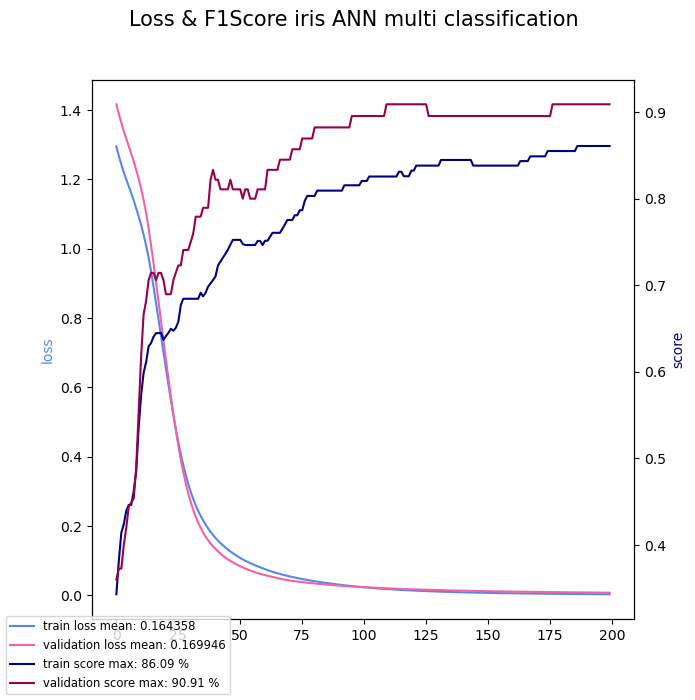

In [8]:
work.draw_two_plot(loss_dict, score_dict, 'Loss & F1Score')

In [9]:
test_loss, test_f1, test_pred = work.testing(lang_model, test_dt.X_test_ts, test_dt.y_test_ts)

print(f"test loss    : {test_loss.item():10.8f}")
print(f"test F1 Score: {test_f1.item()*100:.2f} %\n")


test loss    : 0.00596059
test F1 Score: 92.59 %



주어진 데이터로만 했을때는 별ㄹ호 높지 않네 

- 데이터 추가하고 epoch 50에 batch_size 8일때 test score: 82.64%
----
- epoch: 100, early stopping: Ture
    - batch_size: 16
        - test f1 score: 89.29 %
- epoch: 200, early stopping: Ture
    - batch_size: 16
        - test f1 score: 95.69 %

잘돌리면 97% 도 나옴... loss 기준의 임계 카운트가 5라서 그런지 성능은 좋게 나옴